<a href="https://colab.research.google.com/github/ShashankBajpai/ShashanksBizzareAdventures/blob/master/Analytics_vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/ShashankBajpai/ShashanksBizzareAdventures
!pip install xgboost

fatal: destination path 'ShashanksBizzareAdventures' already exists and is not an empty directory.


In [0]:
import pandas as pd
import numpy as np
import math as mt
x = pd.read_csv("/content/ShashanksBizzareAdventures/train.csv")
x

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [0]:
x["Product_Category_1"].max()

20

In [0]:
len(x["Product_Category_1"].unique())

20

In [0]:
x["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [0]:
pd.set_option('display.max_rows',20000)
x["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
6960     183
7012     183
6879     182
7166     182
7027     182
7165     180
6868     180
6883     180
6858     179
7185     178
6923     178
7089     178
6931     178
7093     178
7114     177
7188     177
7060     176
6908     176
7085     176
7167     175
7159     175
6973     175
7146     175
6928     175
6949     175
7192     174
6904     174
7010     174
7962     174
6952     174
7034     174
7047     173
6862     173
6978     172
7108     172
7049     172
6930     172
7067     172
7028     172
7081     172
7046     171
7026     171
7110     171
7024     171
7083     171
6938     171
7048     170
7071     170
7161     170
7111     170
7162     170
6870     170
7013     170
8089     169
7187     169
7075     169
8128     169
6994     169
7038     168
7147     168
7190     168
6954     168
8001     168
6958     168
6972     168
7086     168
8129     167
7134     167
8020     167
6984     167
7016     167
7037     167
6903     167

In [0]:
x.loc[x["Gender"] == 'M',"Gender"] = 0
x.loc[x["Gender"] == 'F',"Gender"] = 1
x.loc[x["Age"] == '0-17',"Age"] = 1
x.loc[x["Age"] == '18-25',"Age"] = 2
x.loc[x["Age"] == '26-35',"Age"] = 3
x.loc[x["Age"] == '36-45',"Age"] = 4
x.loc[x["Age"] == '46-50',"Age"] = 5
x.loc[x["Age"] == '51-55',"Age"] = 6
x.loc[x["Age"] == '55+',"Age"] = 7
x.loc[x["City_Category"] == 'A',"City_Category"] = 1
x.loc[x["City_Category"] == 'B',"City_Category"] = 2
x.loc[x["City_Category"] == 'C',"City_Category"] = 3
x.loc[x["Stay_In_Current_City_Years"] == '0',"Stay_In_Current_City_Years"] = 1
x.loc[x["Stay_In_Current_City_Years"] == '1',"Stay_In_Current_City_Years"] = 2
x.loc[x["Stay_In_Current_City_Years"] == '2',"Stay_In_Current_City_Years"] = 3
x.loc[x["Stay_In_Current_City_Years"] == '3',"Stay_In_Current_City_Years"] = 4
x.loc[x["Stay_In_Current_City_Years"] == '4+',"Stay_In_Current_City_Years"] = 5
x["Product_Category_2"] = x["Product_Category_2"].replace(np.nan,19)
x["Product_Category_3"] = x["Product_Category_3"].replace(np.nan,19)

In [0]:
x

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,1,3,0,3,19.0,19.0,8370
1,1000001,P00248942,1,1,10,1,3,0,1,6.0,14.0,15200
2,1000001,P00087842,1,1,10,1,3,0,12,19.0,19.0,1422
3,1000001,P00085442,1,1,10,1,3,0,12,14.0,19.0,1057
4,1000002,P00285442,0,7,16,3,5,0,8,19.0,19.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,0,6,13,2,2,1,20,19.0,19.0,368
550064,1006035,P00375436,1,3,1,3,4,0,20,19.0,19.0,371
550065,1006036,P00375436,1,3,15,2,5,1,20,19.0,19.0,137
550066,1006038,P00375436,1,7,1,3,3,0,20,19.0,19.0,365


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


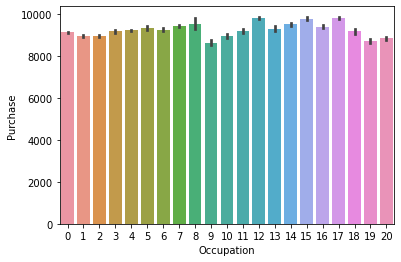

In [0]:
#decided to do data exploration first because i dont know what model i want to fit
import matplotlib.pyplot as plt
import seaborn as sn
plot = sn.barplot(x["Occupation"],x["Purchase"])

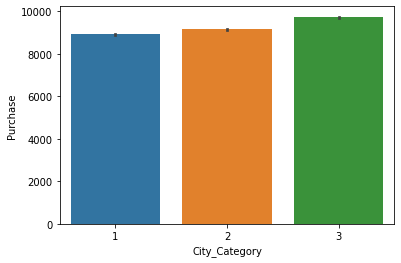

In [0]:
plot2 = sn.barplot(x["City_Category"],x["Purchase"])

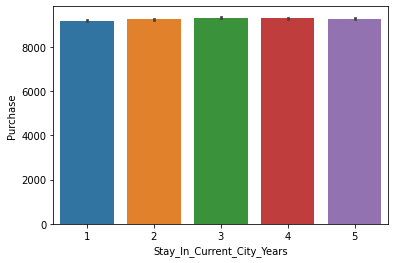

In [0]:
plot3 = sn.barplot(x["Stay_In_Current_City_Years"],x["Purchase"])

In [0]:
y = x["Purchase"]
del x["Purchase"]
del x["Product_ID"]
del x["User_ID"]

for i in x.columns:
  x[i] = pd.to_numeric(x[i])

In [0]:
x["Gender"].dtype

dtype('int64')

In [0]:
#using decision tree for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33)
clf = DecisionTreeRegressor(criterion = "mse",splitter = "best",random_state = 99,max_depth = 11).fit(x_train,y_train)

In [0]:
#using random forest for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33)
clf = RandomForestRegressor(criterion = "mse",random_state = 99,max_depth = 11).fit(x_train,y_train)

In [0]:
#using support vector, shouldnt use but still tried
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33)
clf = SVR(kernel = "linear").fit(x_train,y_train)

In [0]:
#Light Gradient Boosting suffering from too many classes
#cant use classification since described in the problem statement
import lightgbm as lgb
from sklearn.model_selection import train_test_split
x = x.apply(pd.to_numeric)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33)
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.02
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 100

clf = lgb.train(params, d_train, 100)

In [0]:
#using gradient boosting, highest accuracy
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33)
clf = GradientBoostingRegressor(n_estimators = 5000,criterion = "mse",max_features = "sqrt",verbose = 5,learning_rate = 1.6).fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
         2    19356077.1156           11.60m
         3    18292458.8461           11.62m
         4    17843870.5952           11.79m
         5    16947734.2996           11.81m
         6    15223117.8096           11.90m
         7    15028702.9963           11.78m
         8    14527809.0365           11.94m
         9    14390117.5895           11.94m
        10    13959653.3361           12.10m
        11    13726347.4868           12.05m
        12    13553000.8005           12.00m
        13    12660001.1798           11.89m
        14    12236460.3692           11.83m
        15    12112827.3825           11.86m
        16    11881975.5412           12.00m
        17    11733067.3798           12.06m
        18    11645249.5935           12.04m
        19    11611699.1292           12.00m
        20    11515274.6589           12.02m
        21    11477807.3497           11.96m
        22    11318482.1722           12.00m
    

In [0]:
#using xgboost
#your fast as fuck library for gradient boosting
import xgboost as xgb
from sklearn.model_selection import train_test_split
dmatrix = xgb.DMatrix(data = x_train,label = y_train)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33)
clf = xgb.XGBRegressor(num_rounds = 100000,objective = "reg:squarederror",learning_rate = 0.2,max_depth = 5,verbosity = 2).fit(x_train,y_train)

[12:41:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[12:41:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:41:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:41:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:41:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:41:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:41:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12:41:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nod

In [0]:
#Calculating mean square error
ff = clf.predict(x_test)
mse_mse = y_test.values-ff
mse = 0
for i in mse_mse:
  mse = mse + (i*i)
  
mse = mse/len(ff)
print(mt.sqrt(mse))

2900.3681157406304


In [0]:
import matplotlib.pyplot as plt
xgb.plot_tree(clf,num_trees=0)
plt.show()

In [0]:
#test dataset
x2 = pd.read_csv("/content/ShashanksBizzareAdventures/test.csv")
x2

In [0]:
x2.loc[x2["Gender"] == 'M',"Gender"] = 0
x2.loc[x2["Gender"] == 'F',"Gender"] = 1
x2.loc[x2["Age"] == '0-17',"Age"] = 1
x2.loc[x2["Age"] == '18-25',"Age"] = 2
x2.loc[x2["Age"] == '26-35',"Age"] = 3
x2.loc[x2["Age"] == '36-45',"Age"] = 4
x2.loc[x2["Age"] == '46-50',"Age"] = 5
x2.loc[x2["Age"] == '51-55',"Age"] = 6
x2.loc[x2["Age"] == '55+',"Age"] = 7
x2.loc[x2["City_Category"] == 'A',"City_Category"] = 1
x2.loc[x2["City_Category"] == 'B',"City_Category"] = 2
x2.loc[x2["City_Category"] == 'C',"City_Category"] = 3
x2.loc[x2["Stay_In_Current_City_Years"] == '0',"Stay_In_Current_City_Years"] = 1
x2.loc[x2["Stay_In_Current_City_Years"] == '1',"Stay_In_Current_City_Years"] = 2
x2.loc[x2["Stay_In_Current_City_Years"] == '2',"Stay_In_Current_City_Years"] = 3
x2.loc[x2["Stay_In_Current_City_Years"] == '3',"Stay_In_Current_City_Years"] = 4
x2.loc[x2["Stay_In_Current_City_Years"] == '4+',"Stay_In_Current_City_Years"] = 5
x2["Product_Category_2"] = x2["Product_Category_2"].replace(np.nan,99)
x2["Product_Category_3"] = x2["Product_Category_3"].replace(np.nan,99)

In [0]:
del x2["Product_ID"]
results = model.predict(x2)

In [0]:
temp = pd.read_csv("/content/ShashanksBizzareAdventures/test.csv")
x3 = temp[["User_ID","Product_ID"]]
x3["Purchase"] = np.round(results)
x3

In [0]:
x3.to_csv("final.csv")